In [22]:
import os
os.chdir('/home/lewis/PhD/compounds-research')
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from importlib import reload
import datetime as dt
import seaborn as sns

from compounds_research.compound.utils import make_rates_df, make_original_df
from simulator.engine import dai_rate_model
from simulator.engine.dai_rate_params import PARAM_REGIMES, PARAM_REGIME_NUMS
%matplotlib inline

In [23]:
dataframe_regimes = {'6': {'start': dt.datetime(2020, 2, 21, 21, 56, 54), 'end':dt.datetime(2020, 3, 14, 10, 1, 34)},
                     '7': {'start': dt.datetime(2020, 3, 14, 10, 1, 34), 'end':dt.datetime(2020, 4, 6, 18, 19, 23)},
                     '8': {'start': dt.datetime(2020, 4, 6, 18, 19, 23), 'end':dt.datetime(2020, 4, 21, 5, 41, 28)}}

<Figure size 432x288 with 0 Axes>

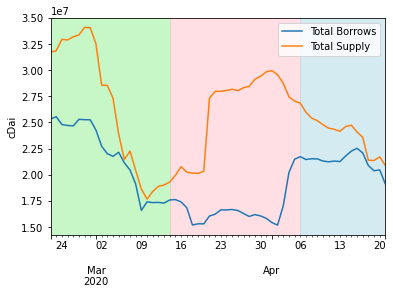

In [57]:
df_cdai = make_original_df(token='cdai', resampling_frequency='D')
df_cdai = df_cdai[dataframe_regimes['6']['start']:dataframe_regimes['8']['end']]

fig = plt.figure()
ax = df_cdai[['total_borrows_history', 'total_supply_history']].plot()
ax.legend(['Total Borrows', 'Total Supply'])
ax.set_ylabel('cDai')


#Period 6
ax.axvspan(dataframe_regimes['6']['start'], dataframe_regimes['6']['end'], alpha=0.5, color='lightgreen')

#Period 7
ax.axvspan(dataframe_regimes['7']['start'], dataframe_regimes['7']['end'], alpha=0.5, color='pink')

#Period 8
ax.axvspan(dataframe_regimes['8']['start'], dataframe_regimes['8']['end'], alpha=0.5, color='lightblue')

plt.savefig('../overleaf/5e6bad2e6490390001d3c466/images/compound-regimes.pdf', bbox_inches='tight', dpi = 300, rasterized=True)


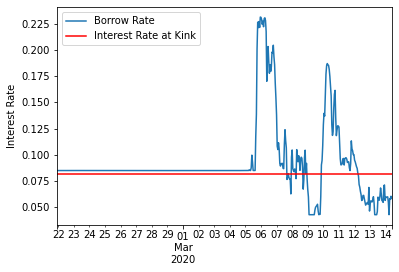

In [60]:
regime_number = '6'
df_cdai = make_original_df(token='cdai', resampling_frequency='H')
df_cdai = df_cdai[df_cdai['regime'] == float(regime_number)]

#Descriptive stats relative to the kink rate
df_cdai['kink_rate'] = (df_cdai['kink'] * df_cdai['multiplier_per_block'] / 1e18 + df_cdai['base_rate_per_block']) / 1e18 * dai_rate_model.BLOCKS_PER_YEAR

fig = plt.figure()
ax = df_cdai['borrow_rates'].plot()
ax.axhline(y=df_cdai['kink_rate'][0], color='red')
ax.set_ylabel('Interest Rate')
ax.legend(['Borrow Rate', 'Interest Rate at Kink'])
plt.savefig('../overleaf/5e6bad2e6490390001d3c466/images/compound-rate-vs-kink' + regime_number + '.pdf', bbox_inches='tight', dpi = 300, rasterized=True)
